In [ ]:
#Analysis 1 Reddit

In [1]:
# For data manipulation and reading/writing Excel and CSV files
import pandas as pd  

# For using regular expressions to clean the text
import re  

# For handling punctuation removal
import string  

In [2]:
# Define a function to preprocess text data
def preprocess_text(text):
    # Check if the input is a string; if not, return it as is
    if not isinstance(text, str):
        return text
    
    # Convert text to lowercase
    text = text.lower()
    
    # Remove hyphens
    text = text.replace('-', '')
    
    # Remove URLs (starting with http, https, or www)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    
    # Remove punctuation using string translation
    text = text.translate(str.maketrans('', '', string.punctuation))
    
    # Remove parentheses, curly braces, and square brackets
    text = re.sub(r'[(){}[\]]', '', text)
    
    # Replace multiple spaces with a single space and trim leading/trailing spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    return text

In [3]:
# Specify the file path of the Reddit data (Excel format)
file_path = r'C:\Users\hp\Desktop\Squid Game Raw Data\2Cho Sang-woo\Reddit\Cho_Sang-woo_Reddit_Corpus.xlsx'

# Read the Excel file into a pandas DataFrame
reddit_data = pd.read_excel(file_path)

In [4]:
# Apply the preprocess_text function to the 'text' column
reddit_data['processed_text'] = reddit_data['text'].apply(preprocess_text)

In [5]:
# Specify the output path for the cleaned CSV file
output_path = r'C:\Users\hp\Desktop\Squid Game Raw Data\2Cho Sang-woo\Reddit\Cho_Sang-woo_Reddit_Corpus_Cleaned.csv'

# Save the processed data to a CSV file with UTF-8 encoding (with BOM)
reddit_data.to_csv(output_path, index=False, encoding='utf-8-sig')

In [6]:
print("Preprocessing complete. Cleaned data saved to:", output_path)

Preprocessing complete. Cleaned data saved to: C:\Users\hp\Desktop\Squid Game Raw Data\2Cho Sang-woo\Reddit\Cho_Sang-woo_Reddit_Corpus_Cleaned.csv


In [17]:
# For creating bar charts
import matplotlib.pyplot as plt  

In [18]:
# Specify the path of the cleaned Reddit data file
file_path = r'C:\Users\hp\Desktop\Squid Game Raw Data\2Cho Sang-woo\Reddit\Cho_Sang-woo_Reddit_Corpus_Cleaned.csv'

# Read the CSV file into a pandas DataFrame
reddit_data = pd.read_csv(file_path)


In [19]:
# Define a list of characters whose mentions will be counted
characters = [
    'gihun', 'saebyeok', 'ali', 'jiyeong', 'junho', 'inho', 
    'mineyo', 'salesman', 'deoksu', 'ilnam', 'gayeong', 
    'malsoon', 'eunji', 'hyejin', 'kang cheol'
]

In [20]:
# Initialize a dictionary to store the frequency count of each character
frequency = {character: 0 for character in characters}

In [21]:
# Count mentions of each character in the processed Reddit text
for text in reddit_data['processed_text']:
    if isinstance(text, str):  # Ensure the text is a string
        for character in characters:
            # Increment the count if the character is mentioned (case-insensitive)
            if character in text.lower():
                frequency[character] += 1

In [22]:
# Convert the frequency dictionary into a DataFrame for easier visualization
frequency_df = pd.DataFrame(list(frequency.items()), columns=['Character', 'Frequency'])

In [23]:
# Sort the DataFrame by frequency in descending order and select the top 5 characters
top5_df = frequency_df.sort_values(by='Frequency', ascending=False).head(5)

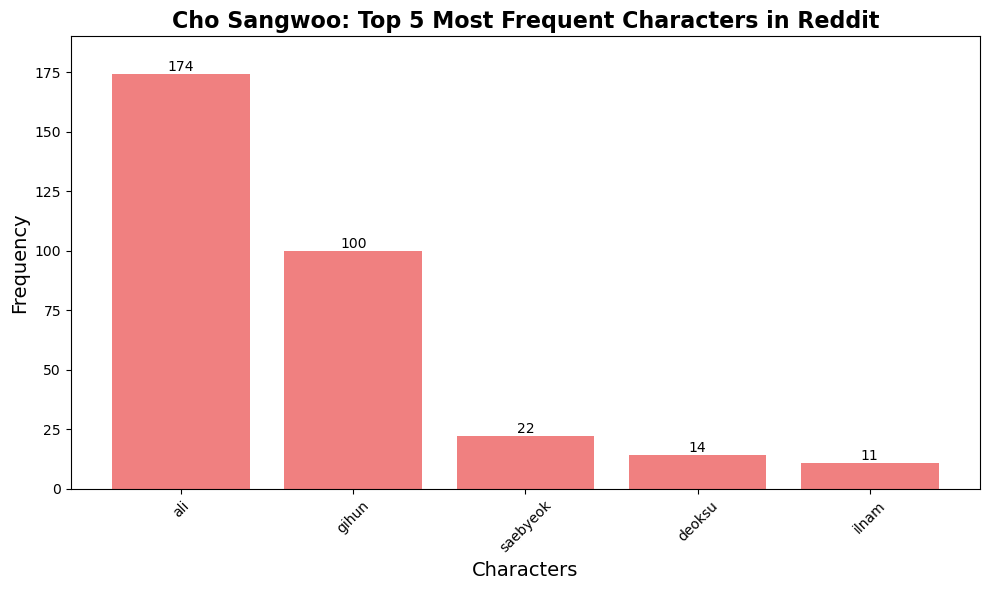

In [26]:
# Set up the bar chart with a specific size
plt.figure(figsize=(10, 6))

# Create the bar chart for the top 5 characters and set the color to 'lightcoral'
bars = plt.bar(top5_df['Character'], top5_df['Frequency'], color='lightcoral')

# Add title and labels to the chart
plt.title('Cho Sangwoo: Top 5 Most Frequent Characters in Reddit', fontsize=16, fontweight='bold')
plt.xlabel('Characters', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.ylim(0, 190)  # Adjust y-axis range to fit the data

# Display frequency values on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), ha='center', va='bottom')

# Rotate x-axis labels for better readability and adjust layout
plt.xticks(rotation=45)
plt.tight_layout()

# Show the final bar chart
plt.show()

In [27]:
# For performing sentiment analysis using VADER
from nltk.sentiment import SentimentIntensityAnalyzer  

In [28]:
# Specify the path to the cleaned Reddit data file
file_path = r'C:\Users\hp\Desktop\Squid Game Raw Data\2Cho Sang-woo\Reddit\Cho_Sang-woo_Reddit_Corpus_Cleaned.csv'

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(file_path)

In [30]:
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Initialize counters for sentiment categories
positive_count = 0
neutral_count = 0
negative_count = 0

In [31]:
# Analyze sentiment for each comment in the 'processed_text' column
for text in df['processed_text']:
    if isinstance(text, str):  # Ensure that the text is a string
        sentiment_score = sia.polarity_scores(text)  # Get sentiment scores
        
        # Update counters based on the compound score
        if sentiment_score['compound'] > 0:
            positive_count += 1
        elif sentiment_score['compound'] < 0:
            negative_count += 1
        else:
            neutral_count += 1

In [32]:
# Store the sentiment counts in a dictionary
sentiment_counts = {'Positive': positive_count, 'Neutral': neutral_count, 'Negative': negative_count}

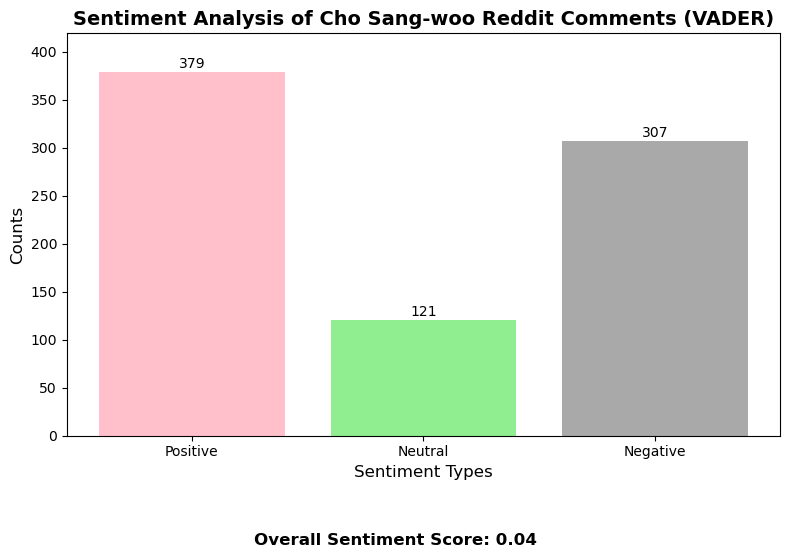

In [33]:
# Create a bar chart for sentiment counts
plt.figure(figsize=(8, 5))
bars = plt.bar(sentiment_counts.keys(), sentiment_counts.values(), color=['pink', 'lightgreen', 'darkgrey'])

# Add count labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha='center', va='bottom')

# Add labels and a title to the chart
plt.xlabel('Sentiment Types', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Sentiment Analysis of Cho Sang-woo Reddit Comments (VADER)', fontsize=14, fontweight='bold')

# Adjust the Y-axis range to fit the bars and set the layout
plt.ylim(0, max(sentiment_counts.values()) + 40)
plt.tight_layout()

# Calculate the overall sentiment score for all comments
overall_score = df['processed_text'].apply(lambda x: sia.polarity_scores(x)['compound'] if isinstance(x, str) else 0).mean()

# Display the overall sentiment score below the chart
plt.figtext(0.5, -0.1, f'Overall Sentiment Score: {overall_score:.2f}', ha='center', fontsize=12, fontweight='bold')

# Display the bar chart
plt.show()

In [34]:
# Specify the path to the Excel file containing sentiment classification data
input_file_path = r'C:\Users\hp\Desktop\Squid Game Raw Data\2Cho Sang-woo\Reddit\Adjective_Sentiment_Frequencies.xlsx'

# Read the data into a pandas DataFrame
result_df = pd.read_excel(input_file_path)


In [35]:
# Count the number of occurrences of each sentiment
sentiment_counts = result_df['Sentiment'].value_counts()


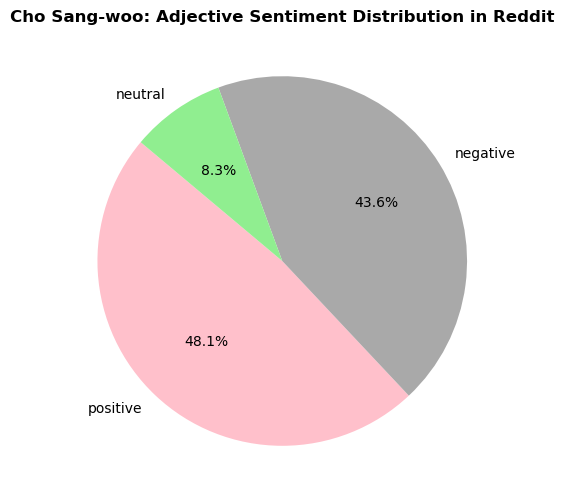

In [36]:
# Define a mapping of sentiment types to specific colors
color_mapping = {
    'positive': 'pink',
    'neutral': 'lightgreen',
    'negative': 'darkgrey'
}

# Extract the correct colors for the labels in the same order as the sentiment counts
colors = [color_mapping[sentiment] for sentiment in sentiment_counts.index]

# Create a pie chart for the sentiment distribution
plt.figure(figsize=(8, 6))
plt.pie(
    sentiment_counts, 
    labels=sentiment_counts.index, 
    colors=colors, 
    autopct='%1.1f%%', 
    startangle=140
)

# Add a title to the chart
plt.title('Cho Sang-woo: Adjective Sentiment Distribution in Reddit', weight='bold')

# Display the pie chart
plt.show()


In [37]:
# Specify the path to the Excel file containing sentiment classification data
input_file_path = r'C:\Users\hp\Desktop\Squid Game Raw Data\2Cho Sang-woo\Reddit\Adjective_Sentiment_Frequencies.xlsx'

# Read the data into a pandas DataFrame
result_df = pd.read_excel(input_file_path)

# Ensure that the correct column names are used
print(result_df.columns)  # Check the column names


Index(['Adjective_x', 'Frequency', 'Adjective_lower', 'Adjective_y',
       'Sentiment'],
      dtype='object')


In [38]:
# Get the top 10 most frequently occurring adjectives
top_10_adjectives = result_df.nlargest(10, 'Frequency')

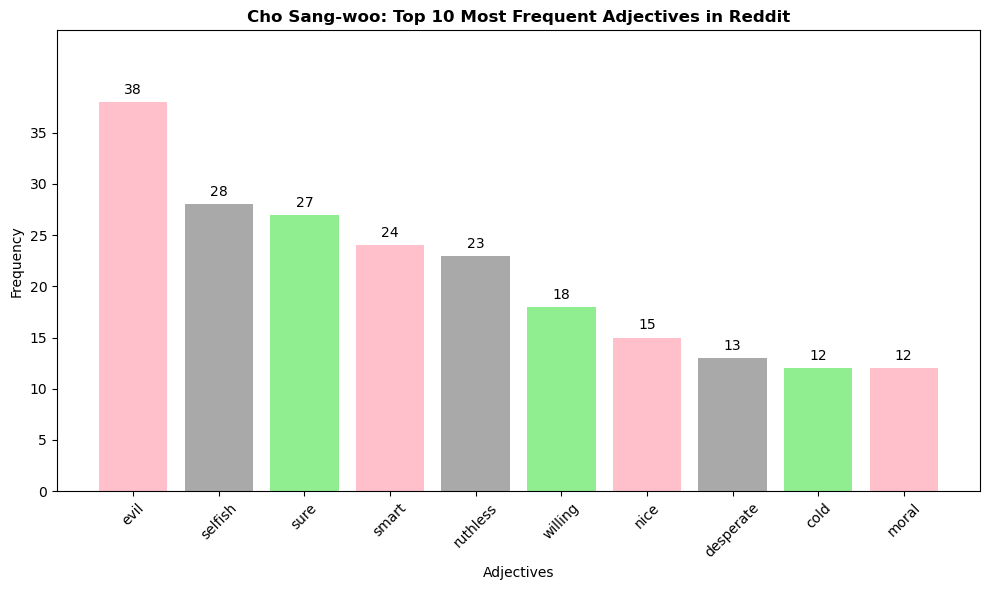

In [39]:
# Create a bar chart for the top 10 most frequent adjectives
plt.figure(figsize=(10, 6))
bars = plt.bar(top_10_adjectives['Adjective_lower'], top_10_adjectives['Frequency'], color=colors)

# Add labels and a title to the chart
plt.xlabel('Adjectives')
plt.ylabel('Frequency')
plt.title('Cho Sang-woo: Top 10 Most Frequent Adjectives in Reddit', weight='bold')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Set y-axis limits and ensure integer ticks for better scaling
plt.ylim(0, 45)
plt.yticks(range(0, 40, 5))  # Display y-axis values at intervals of 5

# Display the frequency values on top of each bar
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, str(int(yval)), ha='center', va='bottom')

# Adjust layout and display the bar chart
plt.tight_layout()
plt.show()

In [40]:
# Specify the path to the Excel file containing sentiment classification data
input_file_path = r'C:\Users\hp\Desktop\Squid Game Raw Data\2Cho Sang-woo\Reddit\Adjective_Sentiment_Frequencies.xlsx'

# Read the data into a pandas DataFrame
result_df = pd.read_excel(input_file_path)


In [41]:
# Get the top 30 most frequently occurring adjectives
top_30_adjectives = result_df.nlargest(30, 'Frequency')

# Separate adjectives by sentiment
positive_adjectives = top_30_adjectives[top_30_adjectives['Sentiment'] == 'positive']
neutral_adjectives = top_30_adjectives[top_30_adjectives['Sentiment'] == 'neutral']
negative_adjectives = top_30_adjectives[top_30_adjectives['Sentiment'] == 'negative']


In [42]:
# Find the maximum length among the three categories
max_length = max(len(positive_adjectives), len(neutral_adjectives), len(negative_adjectives))

# Format adjectives with their frequencies for display
positive_adjectives_list = list(positive_adjectives['Adjective_lower'] + ' (' + positive_adjectives['Frequency'].astype(str) + ')')
neutral_adjectives_list = list(neutral_adjectives['Adjective_lower'] + ' (' + neutral_adjectives['Frequency'].astype(str) + ')')
negative_adjectives_list = list(negative_adjectives['Adjective_lower'] + ' (' + negative_adjectives['Frequency'].astype(str) + ')')

# Pad the lists with empty strings to make them the same length for table display
positive_adjectives_list.extend([""] * (max_length - len(positive_adjectives_list)))
neutral_adjectives_list.extend([""] * (max_length - len(neutral_adjectives_list)))
negative_adjectives_list.extend([""] * (max_length - len(negative_adjectives_list)))


In [43]:
# Combine the lists into a DataFrame for display
df_combined = pd.DataFrame({
    'Positive': positive_adjectives_list,
    'Neutral': neutral_adjectives_list,
    'Negative': negative_adjectives_list
})

# Remove rows that are entirely empty for a cleaner display
df_combined = df_combined.replace("", None).dropna(how='all')


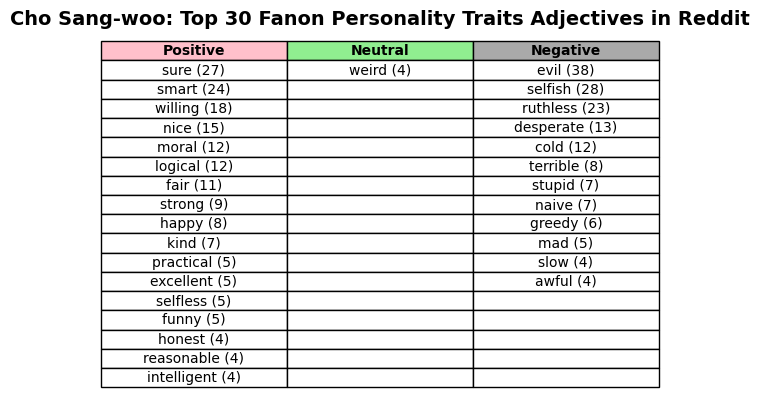

In [44]:
# Define colors for each sentiment category
color_map = {
    'Positive': 'pink',
    'Neutral': 'lightgreen',
    'Negative': 'darkgrey'
}

# Create a figure and axis for the table
fig, ax = plt.subplots(figsize=(6, len(df_combined) * 0.25 + 0.5))
ax.axis('tight')
ax.axis('off')

# Create the table with the DataFrame data
table = ax.table(cellText=df_combined.values, colLabels=df_combined.columns, cellLoc='center', loc='center')

# Apply colors to the header
for i, key in enumerate(df_combined.columns):
    table[0, i].set_facecolor(color_map[key])
    table[0, i].set_text_props(weight='bold', color='black')

# Adjust font size and cell scale for better readability
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Add a title to the table
plt.title('Cho Sang-woo: Top 30 Fanon Personality Traits Adjectives in Reddit', fontsize=14, weight='bold', pad=10)

# Adjust layout to make the title closer to the table
plt.subplots_adjust(top=0.85)

# Display the plot
plt.show()


In [ ]:
#Analysis 2 AO3

In [45]:
# Specify the path to the CSV file containing the AO3 metadata
file_path = r'C:\Users\hp\Desktop\Squid Game Raw Data\2Cho Sang-woo\Cho_Sang-woo_AO3_metadata.csv'

# Read the data into a pandas DataFrame
df = pd.read_csv(file_path)


In [46]:
# Define a function to preprocess text
def preprocess_text(text):
    # Ensure that the input is a string
    if not isinstance(text, str):
        return text
    # 1. Remove hyphens from the text
    text = text.replace('-', '')
    # 2. Remove parentheses and other brackets but keep the content inside
    text = re.sub(r'[(){}[\]]', '', text)
    # 3. Trim extra spaces from the beginning and end
    text = text.strip()
    return text


In [47]:
# List of columns to clean
columns_to_clean = ['title', 'author', 'rating', 'warnings', 'category', 'relationships', 'additional_tags', 'characters']

# Apply the preprocessing function to each specified column
for column in columns_to_clean:
    df[column] = df[column].apply(lambda x: preprocess_text(str(x)))


In [48]:
# Fill missing values with empty strings
df.fillna('', inplace=True)

# Remove extra spaces from all string entries in the DataFrame
df = df.applymap(lambda x: x.strip() if isinstance(x, str) else x)


In [49]:
# Specify the path for the output CSV file
output_path = r'C:\Users\hp\Desktop\Squid Game Raw Data\2Cho Sang-woo\Cho_Sang-woo_AO3_metadata_cleaned.csv'

# Save the cleaned DataFrame to a new CSV file with UTF-8 encoding
df.to_csv(output_path, index=False, encoding='utf-8')

print("SUCESS")


SUCESS


In [50]:
# Specify the path to the cleaned AO3 metadata CSV file
file_path = r'C:\Users\hp\Desktop\Squid Game Raw Data\2Cho Sang-woo\Cho_Sang-woo_AO3_metadata_cleaned.csv'

# Read the data into a pandas DataFrame
df = pd.read_csv(file_path)


In [51]:
# Filter rows where 'characters' column contains 'Cho Sangwoo'
df_cho_sangwoo = df[df['characters'].str.contains('Cho Sangwoo', case=False, na=False)]


In [52]:
# Define a function to remove 'Cho Sangwoo' from the character list
def remove_cho_sangwoo(text):
    # Ensure the input is a string
    if not isinstance(text, str):
        return text
    # Remove 'Cho Sangwoo' and any extra spaces
    text = re.sub(r'\bCho Sangwoo\b', '', text, flags=re.IGNORECASE).strip()
    # Remove extra commas or spaces
    text = re.sub(r',\s*,', ',', text).strip(', ')
    return text

# Apply the function to the 'characters' column to remove 'Cho Sangwoo'
df_cho_sangwoo['characters_cleaned'] = df_cho_sangwoo['characters'].apply(remove_cho_sangwoo)


In [53]:
# Split the 'characters_cleaned' by commas and explode into individual characters
all_characters = df_cho_sangwoo['characters_cleaned'].str.split(',').explode().str.strip()

# Remove punctuation like quotes from character names
all_characters = all_characters.str.replace(r"[\"'`]", "", regex=True)

# Filter out any empty or NA values
all_characters = all_characters[all_characters != ""]


In [54]:
# Count the occurrences of each character and select the top 6 most frequent
character_counts = all_characters.value_counts()
top_5_characters = character_counts.head(5)


In [56]:
# Display the top 5 characters with their frequencies
print("Top 5 most frequent characters appearing alongside Cho Sangwoo:")
print(top_5_characters.head(5))

# Save the top 5 character frequencies to a CSV file without punctuation
output_path = r'C:\Users\hp\Desktop\Squid Game Raw Data\2Cho Sang-woo\top_5_character_frequencies_cleaned.csv'
top_5_characters.head(5).to_csv(output_path, encoding='utf-8', header=['Frequency'])

print("The frequency results of the top 5 characters (without punctuation) have been saved as a CSV file!")


Top 5 most frequent characters appearing alongside Cho Sangwoo:
Seong Gihun      24
Ali Abdul         7
Kang Saebyeok     6
Oh Ilnam          2
JiYeong           2
Name: characters_cleaned, dtype: int64
The frequency results of the top 5 characters (without punctuation) have been saved as a CSV file!


In [57]:
# Data from the analysis
characters = ['Seong Gihun', 'Ali Abdul', 'Kang Saebyeok', 'Oh Ilnam', 'JiYeong']
frequencies = [24, 7, 6, 2, 2]


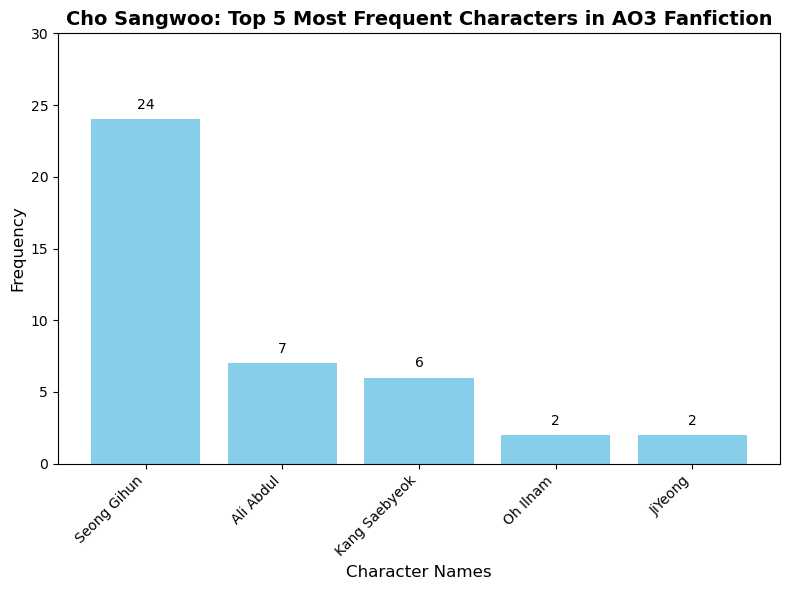

In [59]:
# Create a bar chart for character frequencies
plt.figure(figsize=(8, 6))
bars = plt.bar(characters, frequencies, color='skyblue')

# Add frequency labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha='center', va='bottom')

# Add axis labels and a title
plt.xlabel('Character Names', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Cho Sangwoo: Top 5 Most Frequent Characters in AO3 Fanfiction', fontsize=14, fontweight='bold')

# Adjust y-axis range and rotate x-axis labels
plt.ylim(0, 30)  # Adjust range based on your data
plt.xticks(rotation=45, ha='right')

# Display the chart with a tight layout
plt.tight_layout()
plt.show()

In [60]:
# Read the cleaned metadata
file_path = r'C:\Users\hp\Desktop\Squid Game Raw Data\2Cho Sang-woo\Cho_Sang-woo_AO3_metadata_cleaned.csv'
df = pd.read_csv(file_path)

# Filter rows containing 'Cho Sangwoo' in the 'relationships' column
df_cho_sangwoo = df[df['relationships'].str.contains('Cho Sangwoo', case=False, na=False)]

# Function to clean up the 'relationships' column
def clean_relationships(text):
    # Ensure the input is a string
    if not isinstance(text, str):
        return text
    # Remove extra spaces
    text = text.strip()
    return text

# Apply cleaning function to the 'relationships' column
df_cho_sangwoo['relationships_cleaned'] = df_cho_sangwoo['relationships'].apply(clean_relationships)

# Split each relationship and count frequencies
all_relationships = df_cho_sangwoo['relationships_cleaned'].str.split(',').explode().str.strip()

# Count the occurrences of each relationship
relationship_counts = all_relationships.value_counts()

# Get the top 5 most common relationships
top_5_relationships = relationship_counts.head(5)

# Display the results
print("Top 5 most common relationships featuring Cho Sangwoo:")
print(top_5_relationships)

# If saving the results to a file is needed
output_path = r'C:\Users\hp\Desktop\Squid Game Raw Data\2Cho Sang-woo\top_5_relationship_frequencies.csv'
top_5_relationships.to_csv(output_path, encoding='utf-8', header=['Frequency'])

print("The relationship frequency results have been saved as a CSV file!")


Top 5 most common relationships featuring Cho Sangwoo:
'Cho Sangwoo/Seong Gihun'      21
'Ali Abdul/Cho Sangwoo'         4
'Cho Sangwoo & Seong Gihun'     4
'Ali Abdul & Cho Sangwoo'       2
'Jiyeong/Kang Saebyeok'         2
Name: relationships_cleaned, dtype: int64
The relationship frequency results have been saved as a CSV file!


In [61]:
# Data for the top 5 relationships
relationships = [
    'Cho Sangwoo/Seong Gihun', 
    'Ali Abdul/Cho Sangwoo', 
    'Cho Sangwoo & Seong Gihun', 
    'Ali Abdul & Cho Sangwoo', 
    'Jiyeong/Kang Saebyeok'
]
frequencies = [21, 4, 4, 2, 2]


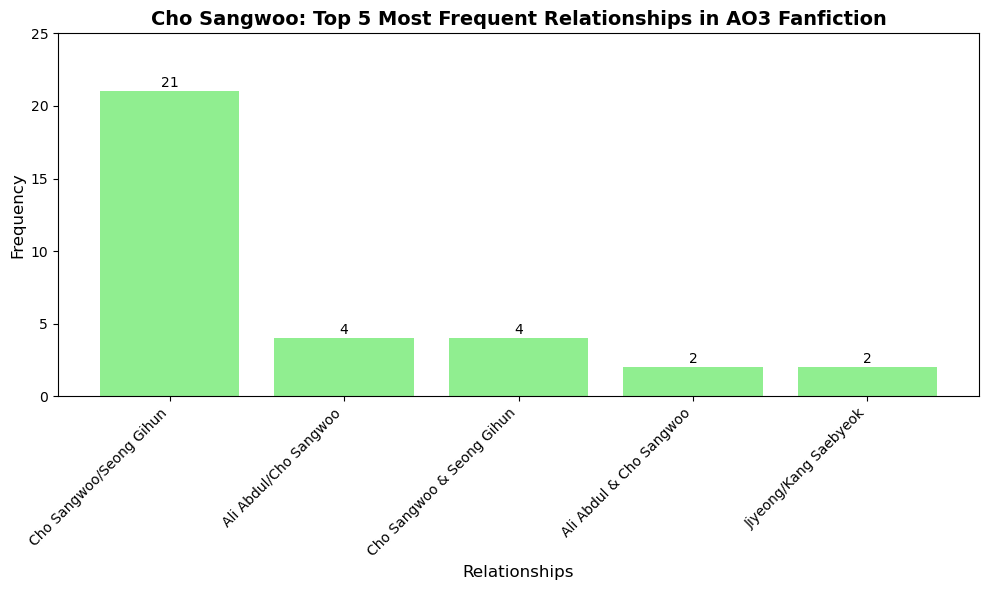

In [62]:
# Create a bar chart with the specified figure size
plt.figure(figsize=(10, 6))
bars = plt.bar(relationships, frequencies, color='lightgreen')

# Add frequency labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, int(yval), ha='center', va='bottom')

# Add labels and a title to the chart
plt.xlabel('Relationships', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Cho Sangwoo: Top 5 Most Frequent Relationships in AO3 Fanfiction', fontsize=14, fontweight='bold')

# Set the Y-axis range for better scaling
plt.ylim(0, 25)

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Adjust layout for a better fit and display the chart
plt.tight_layout()
plt.show()

In [63]:
# Specify the path to the CSV file containing the full text data
file_path = r'C:\Users\hp\Desktop\Squid Game Raw Data\2Cho Sang-woo\Cho_Sang-woo_AO3_full_text.csv'

# Read the data into a pandas DataFrame
df = pd.read_csv(file_path)

In [64]:
# Define a function to preprocess the text data
def preprocess_text(text):
    # Ensure that the input is a string
    if not isinstance(text, str):
        return text
    # 1. Convert the text to lowercase
    text = text.lower()
    # 2. Remove hyphens from the text
    text = text.replace('-', '')
    # 3. Remove parentheses and other brackets but keep the content inside
    text = re.sub(r'[(){}[\]]', '', text)
    # 4. Trim extra spaces from the beginning and end
    text = text.strip()
    return text

In [65]:
# Apply the preprocessing function to the 'full_text' column
df['full_text'] = df['full_text'].apply(preprocess_text)

# Preview the cleaned full text data
print("Preview of the cleaned data:")
print(df['full_text'].head(10))  # Display the first 10 rows for preview


Preview of the cleaned data:
0    “hyung.”gihun looked up at the man standing in...
1    “sangwoo!”sangwoo looked out the window from h...
2    sangwoo was sitting on the edge of his bed, gl...
3    “but why is the pride of ssangmundong, the gen...
4    sangwoo wasn’t all that surprised to see peopl...
5    hands come up to scrub at bleary eyes, chest h...
6    love would be too strong a word to describe wh...
7    sangwoo’s reclined back on his bed, as ali hel...
8    gihun laid on the ground, his limbs strewn abo...
9    sangwoo clutched his left cheek; his teeth wer...
Name: full_text, dtype: object


In [66]:
# Specify the path for the output CSV file
output_path = r'C:\Users\hp\Desktop\Squid Game Raw Data\2Cho Sang-woo\Cho_Sang-woo_AO3_full_text_cleaned.csv'

# Save the cleaned DataFrame to a new CSV file with UTF-8 encoding
df.to_csv(output_path, index=False, encoding='utf-8-sig')  # Use utf-8-sig for compatibility with Excel

print("Full text preprocessing is complete, and the file has been saved!")


Full text preprocessing is complete, and the file has been saved!


In [67]:
# Specify the path to the cleaned full text data
file_path_cleaned = r'C:\Users\hp\Desktop\Squid Game Raw Data\2Cho Sang-woo\Cho_Sang-woo_AO3_full_text_cleaned.csv'

# Read the data into a pandas DataFrame
df = pd.read_csv(file_path_cleaned)

In [68]:
# Define a function to filter sentences containing "Cho Sangwoo"
def filter_sentences(text):
    # Use regular expressions to split text into sentences based on punctuation (period, question mark, exclamation mark)
    sentences = re.split(r'(?<=[.!?]) +', text)
    # Filter sentences that contain "Sangwoo" (case insensitive)
    filtered_sentences = [sentence for sentence in sentences if 'sangwoo' in sentence.lower()]
    return ' '.join(filtered_sentences)  # Return the filtered sentences as a single string

In [69]:
# Apply the filtering function to the 'full_text' column
df['filtered_text'] = df['full_text'].apply(filter_sentences)

# Keep only rows where 'filtered_text' is not empty
df_filtered = df[df['filtered_text'] != '']

# Specify the path for the output CSV file
output_path_filtered = r'C:\Users\hp\Desktop\Squid Game Raw Data\2Cho Sang-woo\filtered_text_with_Cho_Sang_woo.csv'

# Save the filtered DataFrame to a new CSV file with UTF-8 encoding
df_filtered.to_csv(output_path_filtered, index=False, encoding='utf-8-sig')  # Use utf-8-sig for compatibility with Excel

print("Filtering complete, sentences containing 'Sangwoo' have been saved!")


Filtering complete, sentences containing 'Sangwoo' have been saved!


In [70]:
# Specify the path to the cleaned full text data
file_path = r'C:\Users\hp\Desktop\Squid Game Raw Data\2Cho Sang-woo\Cho_Sang-woo_AO3_full_text_cleaned.csv'

# Read the data into a pandas DataFrame
df = pd.read_csv(file_path)


In [71]:
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Define a function to analyze sentiment using VADER
def analyze_sentiment(text):
    return sia.polarity_scores(text)

# Apply the sentiment analysis function to the 'full_text' column
df['sentiment'] = df['full_text'].apply(analyze_sentiment)

# Extract specific sentiment scores from the 'sentiment' dictionary
df['positive'] = df['sentiment'].apply(lambda x: x['pos'])
df['neutral'] = df['sentiment'].apply(lambda x: x['neu'])
df['negative'] = df['sentiment'].apply(lambda x: x['neg'])
df['compound'] = df['sentiment'].apply(lambda x: x['compound'])

# Specify the path for the output CSV file
output_path = r'C:\Users\hp\Desktop\Squid Game Raw Data\2Cho Sang-woo\vader_sentiment_analysis_results.csv'

# Save the DataFrame with sentiment scores to a new CSV file with UTF-8 encoding
df.to_csv(output_path, index=False, encoding='utf-8-sig')

print("Sentiment analysis results have been saved as a CSV file!")


Sentiment analysis results have been saved as a CSV file!


In [72]:
# Preview the sentiment analysis results
print("Preview of the sentiment analysis results:")
print(df[['full_text', 'positive', 'neutral', 'negative', 'compound']].head())

Preview of the sentiment analysis results:
                                           full_text  positive  neutral  \
0  “hyung.”gihun looked up at the man standing in...     0.142    0.797   
1  “sangwoo!”sangwoo looked out the window from h...     0.116    0.841   
2  sangwoo was sitting on the edge of his bed, gl...     0.111    0.809   
3  “but why is the pride of ssangmundong, the gen...     0.077    0.777   
4  sangwoo wasn’t all that surprised to see peopl...     0.151    0.748   

   negative  compound  
0     0.062    0.9999  
1     0.043    0.9989  
2     0.081    0.9977  
3     0.145   -0.9993  
4     0.101    0.9965  


In [73]:
# Specify the path to the cleaned full text data
file_path = r'C:\Users\hp\Desktop\Squid Game Raw Data\2Cho Sang-woo\Cho_Sang-woo_AO3_full_text_cleaned.csv'

# Read the data into a pandas DataFrame
df = pd.read_csv(file_path)

In [74]:
# Initialize the VADER sentiment analyzer
sia = SentimentIntensityAnalyzer()

# Initialize counters for positive, neutral, and negative texts
positive_count = 0
neutral_count = 0
negative_count = 0

# Perform sentiment analysis on each row of text
for text in df['full_text']:
    sentiment_score = sia.polarity_scores(text)
    if sentiment_score['compound'] > 0:
        positive_count += 1
    elif sentiment_score['compound'] < 0:
        negative_count += 1
    else:
        neutral_count += 1

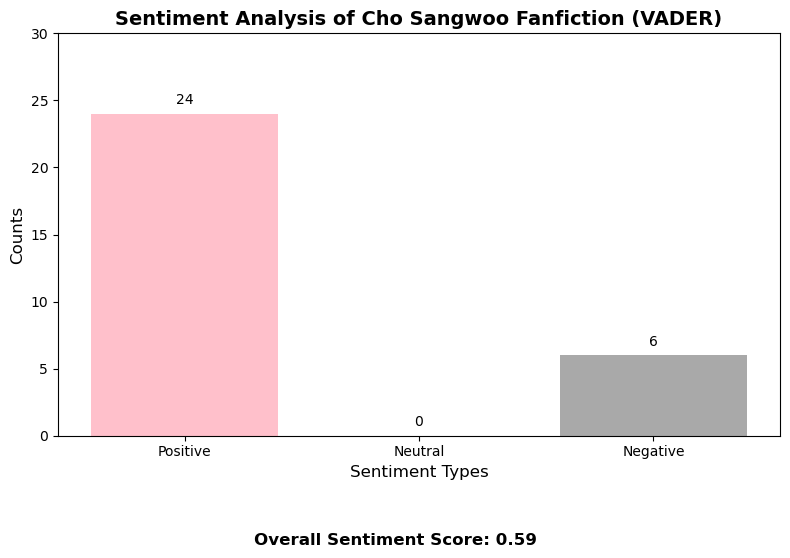

In [75]:
# Data from the sentiment analysis
sentiment_counts = {'Positive': positive_count, 'Neutral': neutral_count, 'Negative': negative_count}

# Create and customize the bar chart
plt.figure(figsize=(8, 5))
bars = plt.bar(sentiment_counts.keys(), sentiment_counts.values(), color=['pink', 'lightgreen', 'darkgrey'])

# Add frequency labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, int(yval), ha='center', va='bottom')

# Add labels and title to the chart
plt.xlabel('Sentiment Types', fontsize=12)
plt.ylabel('Counts', fontsize=12)
plt.title('Sentiment Analysis of Cho Sangwoo Fanfiction (VADER)', fontsize=14, fontweight='bold')

# Set the Y-axis range for better scaling
plt.ylim(0, 30)

# Calculate and display the overall sentiment score
overall_score = df['full_text'].apply(lambda x: sia.polarity_scores(x)['compound']).mean()
plt.figtext(0.5, -0.1, f'Overall Sentiment Score: {overall_score:.2f}', ha='center', fontsize=12, fontweight='bold')

# Adjust layout and display the chart
plt.tight_layout()
plt.show()


In [76]:
# Specify the path to the custom adjective list
adjective_file_path = r'C:\Users\hp\Desktop\Squid Game Raw Data\Canon\1001_Adjectives_for_Personality_Traits.xlsx'

# Read the list into a pandas DataFrame
adjective_list = pd.read_excel(adjective_file_path)

# Convert the adjectives to lowercase and store them in a set for fast lookup
adjectives = set(adjective_list['Adjective'].str.lower().tolist())

In [77]:
# Define a set of words to exclude (words that are not typically used as adjectives)
exclude_words = {'just', 'like', 'only', 'well', 'right', 'now', 'back', 'still', 'even', 'still'}

In [78]:
# Specify the path to the filtered text data containing "Sangwoo"
filtered_text_file_path = r'C:\Users\hp\Desktop\Squid Game Raw Data\2Cho Sang-woo\filtered_text_with_Cho_Sang_woo.csv'

# Read the data into a pandas DataFrame
df = pd.read_csv(filtered_text_file_path)

In [81]:
# Ensure this line is included to use Counter
from collections import Counter  

# Initialize a Counter to track the frequency of adjectives
adjective_counter = Counter()

In [82]:
# Process each text passage to extract adjectives
for text in df['filtered_text']:
    # Tokenize the text into words and convert to lowercase
    words = re.findall(r'\b\w+\b', text.lower())  # Extracts words only
    # Find adjectives that are in the custom list but not in the exclusion set
    found_adjectives = [word for word in words if word in adjectives and word not in exclude_words]
    if found_adjectives:
        print(f"Found adjectives in sentence: {found_adjectives}")  # Debug output for matched adjectives
    # Update the adjective counter with the found adjectives
    adjective_counter.update(found_adjectives)

Found adjectives in sentence: ['smart', 'nice', 'animated', 'funny', 'secretive', 'concerned', 'humble', 'giving', 'familiar', 'nice', 'specific', 'threatening', 'late', 'genius', 'polite', 'stiff', 'steely', 'cheerful', 'cold', 'sharp', 'tense', 'anxious', 'impatient', 'humble', 'nice', 'amicable', 'desperate', 'desperate', 'passionate', 'open', 'slack']
Found adjectives in sentence: ['accepting', 'weak', 'mean', 'nosy', 'silly', 'kind', 'smart', 'sweet', 'serious', 'nervous']
Found adjectives in sentence: ['desperate', 'focused', 'concerned', 'tense', 'intense', 'hesitant', 'vulgar', 'natural', 'present', 'sure', 'confused', 'intense', 'happy']
Found adjectives in sentence: ['genius', 'ungrateful', 'loud', 'loud', 'open', 'demanding', 'giving', 'proud', 'present', 'familiar', 'sure', 'sure', 'familiar', 'precise', 'unbearable', 'desperate']
Found adjectives in sentence: ['quiet', 'concerned', 'bitter', 'desperate', 'gentle', 'satisfied', 'mild', 'irrational', 'awkward', 'positive']
F

In [83]:
# Get the top 10 most common adjectives and their frequencies
top_10_adjectives = adjective_counter.most_common(10)

# Display the results
print("Top 10 Adjectives and Their Frequencies:")
for adjective, frequency in top_10_adjectives:
    print(f"{adjective}: {frequency}")

Top 10 Adjectives and Their Frequencies:
sure: 26
open: 20
cold: 13
desperate: 11
mean: 11
strong: 11
giving: 10
late: 10
loud: 10
quiet: 9


In [84]:
# Specify the path to the custom adjective list
adjective_file_path = r'C:\Users\hp\Desktop\Squid Game Raw Data\Canon\1001_Adjectives_for_Personality_Traits.xlsx'

# Read the list into a pandas DataFrame
adjective_list = pd.read_excel(adjective_file_path)

# Store adjectives and their sentiment tendencies (e.g., positive, negative, neutral)
adjectives_sentiment = {
    row['Adjective'].lower(): row['Sentimental Tendency'] 
    for _, row in adjective_list.iterrows()
}

In [85]:
# Define a set of words to exclude (words that are not typically used as adjectives)
exclude_words = {'just', 'like', 'only', 'well', 'right', 'now', 'back', 'still', 'even'}

In [86]:
# Specify the path to the filtered text data containing "Sangwoo"
filtered_text_file_path = r'C:\Users\hp\Desktop\Squid Game Raw Data\2Cho Sang-woo\filtered_text_with_Cho_Sang_woo.csv'

# Read the data into a pandas DataFrame
df = pd.read_csv(filtered_text_file_path)

In [87]:
# Initialize a Counter to track the frequency of adjectives
adjective_counter = Counter()

# Process each text passage to extract adjectives
for text in df['filtered_text']:
    # Tokenize the text into words and convert to lowercase
    words = re.findall(r'\b\w+\b', text.lower())  # Extracts words only
    # Find adjectives that are in the custom list but not in the exclusion set
    found_adjectives = [word for word in words if word in adjectives_sentiment and word not in exclude_words]
    # Update the adjective counter with the found adjectives
    adjective_counter.update(found_adjectives)

In [88]:
# Save the adjective frequencies into a DataFrame
adjective_freq_df = pd.DataFrame(adjective_counter.items(), columns=['Adjective', 'Frequency'])

# Specify the path for the output Excel file
output_file_path = r'C:\Users\hp\Desktop\Squid Game Raw Data\2Cho Sang-woo\Adjective_Frequencies.xlsx'

# Save the DataFrame to an Excel file
adjective_freq_df.to_excel(output_file_path, index=False)


In [89]:
# Get and display the top 10 most common adjectives and their frequencies
top_10_adjectives = adjective_counter.most_common(10)
print("Top 10 Adjectives and Their Frequencies:")
for adjective, frequency in top_10_adjectives:
    sentiment = adjectives_sentiment.get(adjective, "neutral")  # Default sentiment to 'neutral' if not found
    print(f"{adjective}: {frequency} ({sentiment})")

Top 10 Adjectives and Their Frequencies:
sure: 26 (positive)
open: 20 (positive)
cold: 13 (negative)
desperate: 11 (negative)
mean: 11 (negative)
strong: 11 (positive)
giving: 10 (positive)
late: 10 (negative)
loud: 10 (negative)
quiet: 9 (neutral)


In [90]:

# Data: adjectives, frequencies, and their sentiment tendencies
adjectives = ['sure', 'open', 'cold', 'desperate', 'mean', 'strong', 'giving', 'late', 'loud', 'quiet']
frequencies = [26, 20, 13, 11, 11, 11, 10, 10, 10, 9]
sentiments = ['positive', 'negative', 'negative', 'negative', 'negative', 'positive', 'negative', 'neutral', 'negative', 'positive']


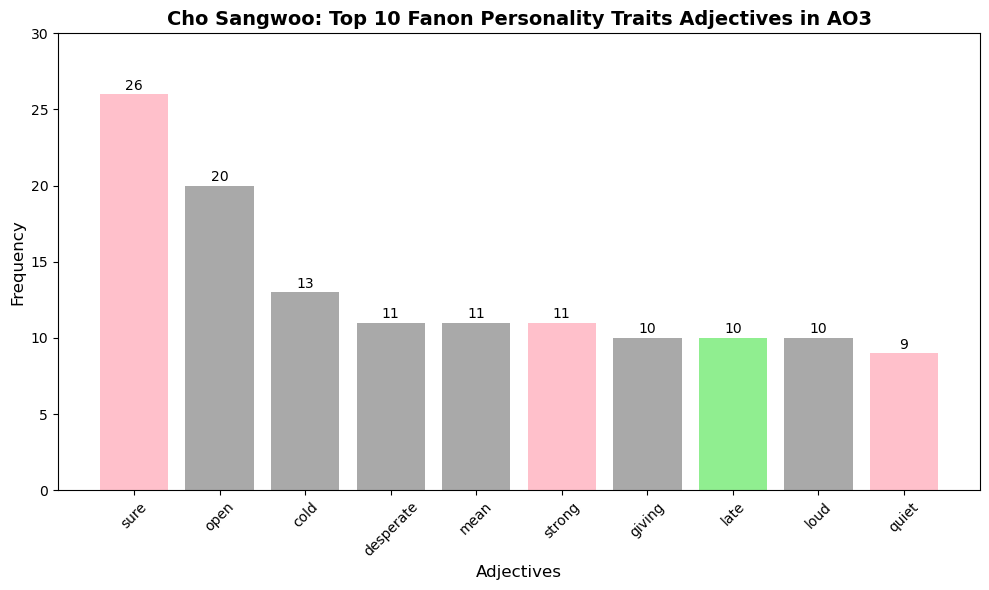

In [91]:
# Set colors based on sentiment tendencies for each adjective
colors = ['pink' if sentiment == 'positive' else 'lightgreen' if sentiment == 'neutral' else 'darkgray' for sentiment in sentiments]

# Create the bar chart and customize its appearance
plt.figure(figsize=(10, 6))
bars = plt.bar(adjectives, frequencies, color=colors)
plt.ylim(0, 30)
plt.xlabel('Adjectives', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Cho Sangwoo: Top 10 Fanon Personality Traits Adjectives in AO3', fontsize=14, fontweight='bold')

# Annotate each bar with its frequency
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 0.1, int(yval), ha='center', va='bottom')

# Rotate x-axis labels and display the chart
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [92]:
# Load the Excel file with adjective frequencies from AO3
input_file_path = r'C:\Users\hp\Desktop\Squid Game Raw Data\2Cho Sang-woo\Adjective_Frequencies.xlsx'
adjective_freq_df = pd.read_excel(input_file_path)


In [93]:
# Load the list of adjectives and their sentiment classification
adjectives_file_path = r'C:\Users\hp\Desktop\Squid Game Raw Data\Canon\1001_Adjectives_for_Personality_Traits.xlsx'
adjectives_df = pd.read_excel(adjectives_file_path, header=None, names=['Adjective', 'Sentiment'])

# Convert adjectives to lowercase for consistent matching
adjectives_df['Adjective'] = adjectives_df['Adjective'].str.lower()
sentiment_dict = adjectives_df.set_index('Adjective')['Sentiment'].str.lower().to_dict()


In [94]:
# Get the top 30 most frequent adjectives
top_30_adjectives = adjective_freq_df.nlargest(30, 'Frequency')

# Convert the adjectives to lowercase for matching
top_30_adjectives['Adjective_lower'] = top_30_adjectives['Adjective'].str.lower()

# Classify each adjective into positive, neutral, or negative
top_30_adjectives['Sentiment'] = top_30_adjectives['Adjective_lower'].apply(lambda x: sentiment_dict.get(x, 'neutral'))


In [95]:
# Separate adjectives by sentiment
positive_adjectives = top_30_adjectives[top_30_adjectives['Sentiment'] == 'positive']
neutral_adjectives = top_30_adjectives[top_30_adjectives['Sentiment'] == 'neutral']
negative_adjectives = top_30_adjectives[top_30_adjectives['Sentiment'] == 'negative']

# Find the maximum length among the three categories
max_length = max(len(positive_adjectives), len(neutral_adjectives), len(negative_adjectives))

# Pad the lists with empty strings to make them the same length
positive_adjectives_list = list(positive_adjectives['Adjective'] + ' (' + positive_adjectives['Frequency'].astype(str) + ')')
neutral_adjectives_list = list(neutral_adjectives['Adjective'] + ' (' + neutral_adjectives['Frequency'].astype(str) + ')')
negative_adjectives_list = list(negative_adjectives['Adjective'] + ' (' + negative_adjectives['Frequency'].astype(str) + ')')

positive_adjectives_list.extend([""] * (max_length - len(positive_adjectives_list)))
neutral_adjectives_list.extend([""] * (max_length - len(neutral_adjectives_list)))
negative_adjectives_list.extend([""] * (max_length - len(negative_adjectives_list)))


In [96]:
# Create a DataFrame to display the results
df_combined = pd.DataFrame({
    'Positive': positive_adjectives_list,
    'Neutral': neutral_adjectives_list,
    'Negative': negative_adjectives_list
})

# Remove empty rows for better appearance
df_combined = df_combined.replace("", None).dropna(how='all')


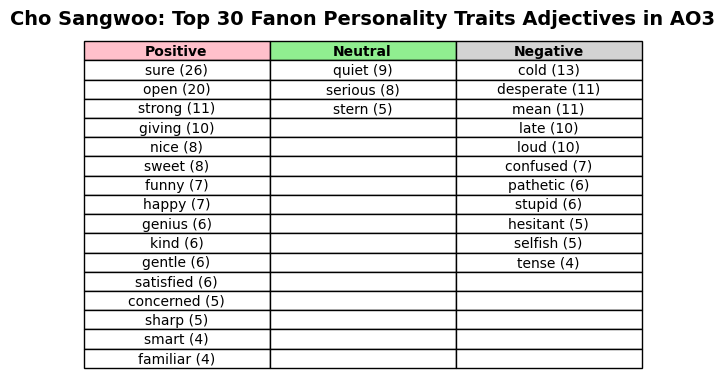

In [97]:
# Define colors for each category
color_map = {
    'Positive': 'pink',
    'Neutral': 'lightgreen',
    'Negative': 'lightgrey' 
}

# Plotting the table
fig, ax = plt.subplots(figsize=(6, len(df_combined) * 0.25 + 0.5))  # Adjust figure size for a tighter layout
ax.axis('tight')
ax.axis('off')

# Create a table
table = ax.table(cellText=df_combined.values, colLabels=df_combined.columns, cellLoc='center', loc='center')

# Apply colors to the header
for i, key in enumerate(df_combined.columns):
    table[0, i].set_facecolor(color_map[key])
    table[0, i].set_text_props(weight='bold', color='black')

# Adjust the font size and scale of the table cells for a tighter fit
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Add the title
plt.title('Cho Sangwoo: Top 30 Fanon Personality Traits Adjectives in AO3', fontsize=14, weight='bold', pad=10)

# Adjust layout to make the title closer to the table
plt.subplots_adjust(top=0.85)

# Display the plot
plt.show()


In [98]:
# Load the Excel file with adjective frequencies from AO3
input_file_path = r'C:\Users\hp\Desktop\Squid Game Raw Data\2Cho Sang-woo\Adjective_Frequencies.xlsx'
adjective_freq_df = pd.read_excel(input_file_path)

# Load the list of adjectives and their sentiment classification
adjectives_file_path = r'C:\Users\hp\Desktop\Squid Game Raw Data\Canon\1001_Adjectives_for_Personality_Traits.xlsx'
adjectives_df = pd.read_excel(adjectives_file_path, header=None, names=['Adjective', 'Sentiment'])


In [99]:
# Convert adjectives to lowercase for consistent matching
adjectives_df['Adjective'] = adjectives_df['Adjective'].str.lower()
sentiment_dict = adjectives_df.set_index('Adjective')['Sentiment'].str.lower().to_dict()

# Convert the adjectives in the frequency DataFrame to lowercase for matching
adjective_freq_df['Adjective_lower'] = adjective_freq_df['Adjective'].str.lower()


In [100]:
# Initialize counters for sentiment frequencies
positive_count = 0
neutral_count = 0
negative_count = 0

# Iterate through the adjectives to classify their sentiment and accumulate frequencies
for _, row in adjective_freq_df.iterrows():
    adj = row['Adjective_lower']
    freq = row['Frequency']
    sentiment = sentiment_dict.get(adj, 'neutral')  # Default to 'neutral' if not found
    if sentiment == 'positive':
        positive_count += freq
    elif sentiment == 'negative':
        negative_count += freq
    else:
        neutral_count += freq


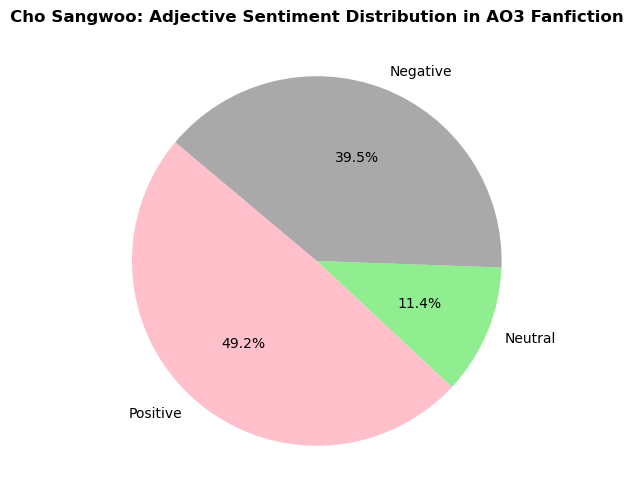

In [101]:
# Create a dictionary to hold the sentiment counts
sentiment_counts = {'Positive': positive_count, 'Neutral': neutral_count, 'Negative': negative_count}

# Plotting the pie chart
colors = ['pink', 'lightgreen', 'darkgrey']
plt.figure(figsize=(8, 6))
plt.pie(sentiment_counts.values(), labels=sentiment_counts.keys(), colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Cho Sangwoo: Adjective Sentiment Distribution in AO3 Fanfiction', weight='bold')
plt.show()


In [ ]:
#End, thanks for your reading